In [21]:
from __future__ import division

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame
from pandas_datareader import data
from datetime import datetime 

sns.set_style('whitegrid')

%matplotlib inline

In [22]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [23]:
end = datetime.now()

start = datetime(end.year -1 , end.month , end.day)

In [24]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [25]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,82.106073,79.887077,80.958720,81.094734,1.352727e+08,80.792098
std,19.358544,18.495097,19.113674,18.913936,5.571563e+07,19.067519
min,55.240002,53.152500,54.607498,54.740002,4.193850e+07,54.202213
25%,67.015625,65.750626,66.408747,66.577501,9.663470e+07,66.224758
50%,77.774998,75.937500,76.610001,77.307503,1.255824e+08,76.818195
75%,92.512501,90.425623,91.213125,91.207499,1.628421e+08,91.043348
max,137.979996,130.529999,137.589996,134.179993,3.743368e+08,134.179993


In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-30 to 2020-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


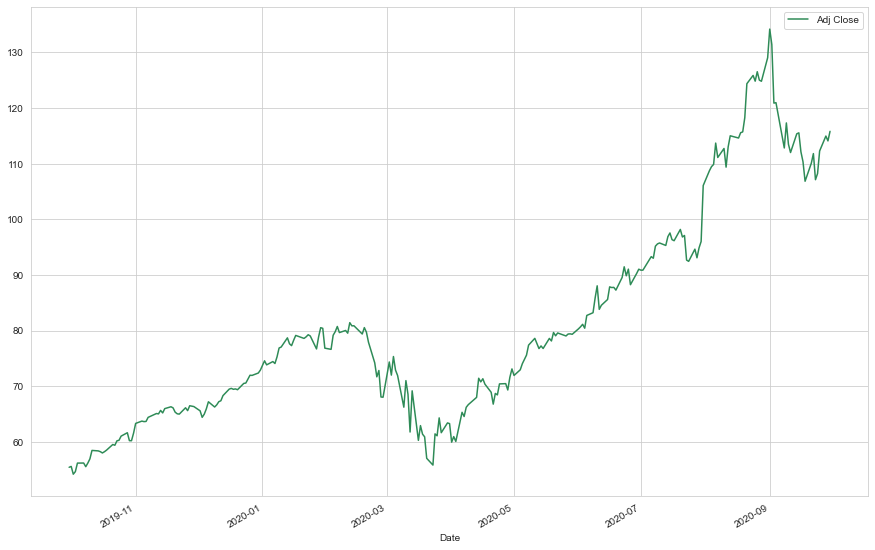

In [74]:
AAPL['Adj Close'].plot(legend=True,figsize=(15,10),color='seagreen')

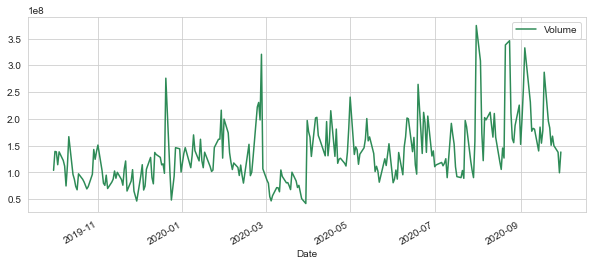

In [73]:
AAPL['Volume'].plot(legend=True,figsize=(10,4),color='seagreen')

In [37]:
#Moving Average - MA 
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

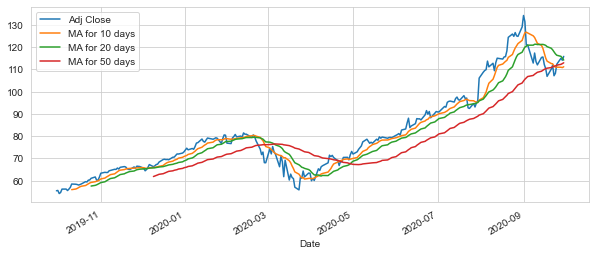

In [41]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days' , 'MA for 50 days']].
plot(subplots=False,figsize=(10,4))

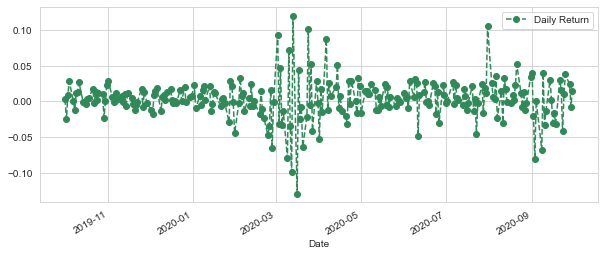

In [72]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4),
                          legend = True,
                          linestyle = '--',
                          marker = 'o',
                          color = 'seagreen')

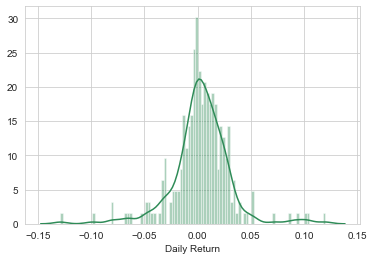

In [71]:
sns.distplot(AAPL['Daily Return'].dropna(),
             bins = 100,
             color = 'seagreen')

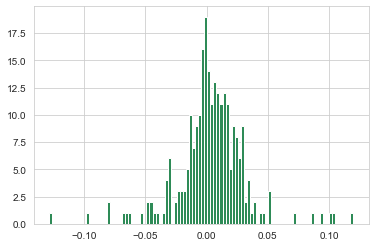

In [70]:
AAPL['Daily Return'].hist(bins = 100, color = 'seagreen')

In [63]:
closing_df = data.DataReader(tech_list, 'yahoo',start,end)['Adj Close']

In [64]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024
2019-10-02,54.202213,1176.630005,133.134323,1713.229980
2019-10-03,54.662643,1187.829956,134.745972,1724.420044
2019-10-04,56.194942,1209.000000,136.565262,1739.650024


In [65]:
tech_return = closing_df.pct_change()

In [66]:
tech_return.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-30,NaN,NaN,NaN,NaN
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532
2019-10-04,0.028032,0.017822,0.013502,0.008832


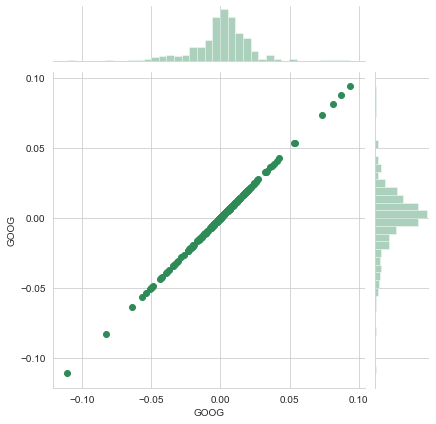

In [69]:
sns.jointplot('GOOG','GOOG',tech_return,
             kind = 'scatter',
             color = 'seagreen')

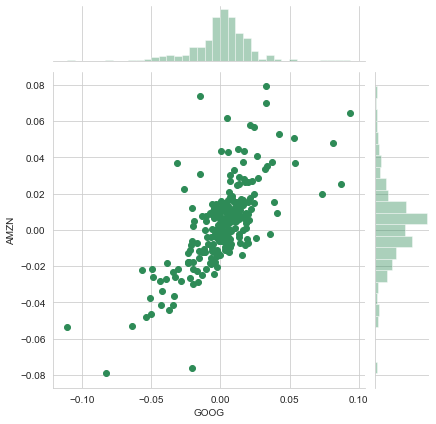

In [81]:
sns.jointplot('GOOG','AMZN',tech_return,
             kind = 'scatter',
             color = 'seagreen')

In [83]:
tech_return.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-30,NaN,NaN,NaN,NaN
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532
2019-10-04,0.028032,0.017822,0.013502,0.008832


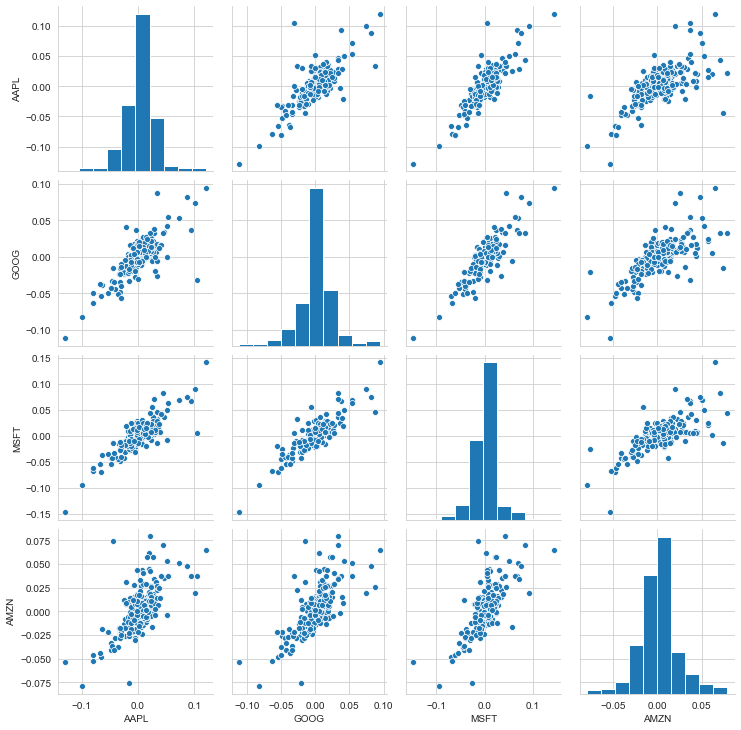

In [87]:
sns.pairplot(tech_return.dropna())

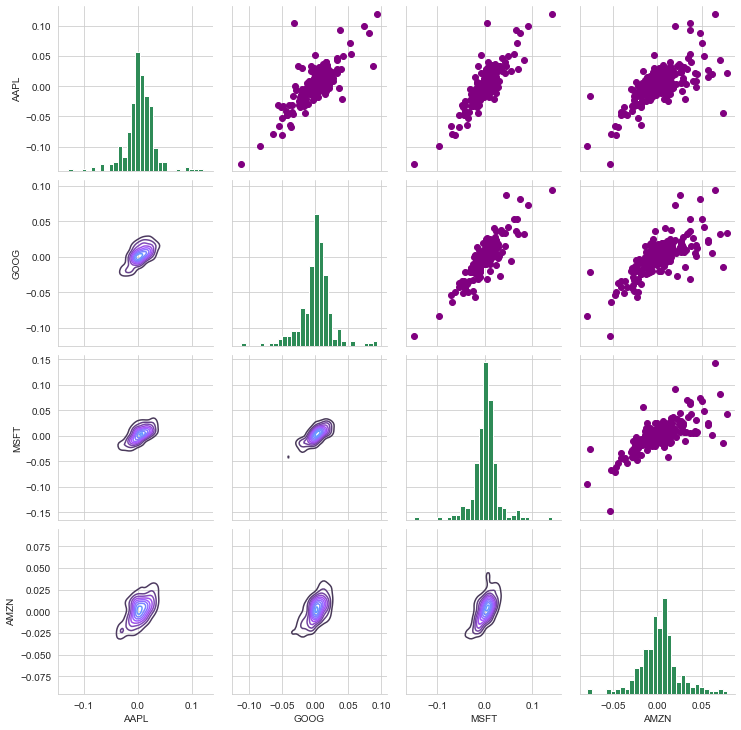

In [92]:
returns_figure = sns.PairGrid(tech_return.dropna())

returns_figure.map_upper(plt.scatter,
                         color = 'purple')

returns_figure.map_lower(sns.kdeplot,
                         cmap = 'cool_d')

returns_figure.map_diag(plt.hist,
                        bins = 30,
                        color = 'seagreen')

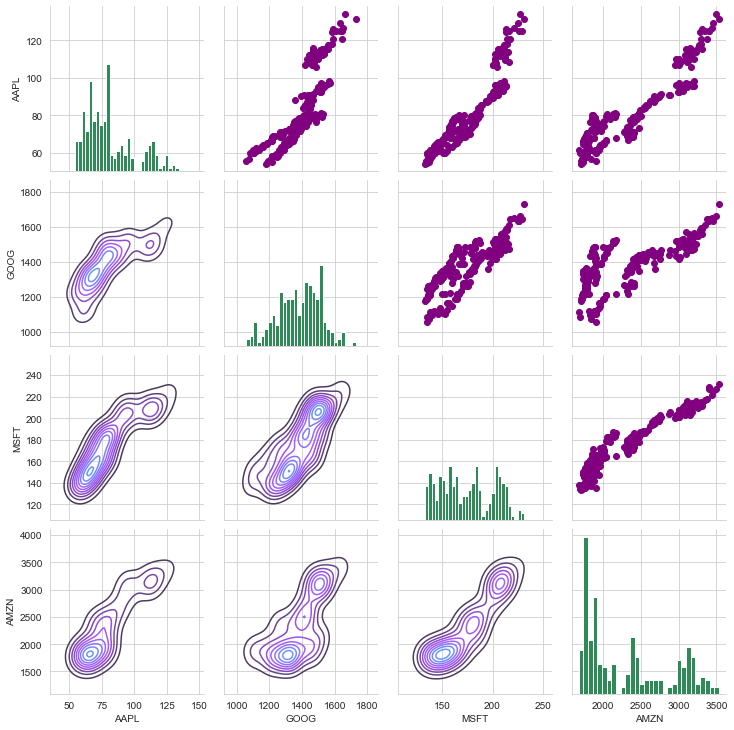

In [93]:
returns_figure = sns.PairGrid(closing_df)

returns_figure.map_upper(plt.scatter,
                         color = 'purple')

returns_figure.map_lower(sns.kdeplot,
                         cmap = 'cool_d')

returns_figure.map_diag(plt.hist,
                        bins = 30,
                        color = 'seagreen')